In [9]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#! pip install py-AutoClean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
#! pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#! pip install --user pycaret
import pycaret as pycaret
from pycaret.regression import *
import lightgbm as lgb




Leyendo el dataset que hemos preparado previamente

In [10]:
df=pd.read_csv('../preprocesados/modeling_features_clean.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   69351 non-null  object 
 1   latitude                        69351 non-null  float64
 2   longitude                       69351 non-null  float64
 3   room_type                       69351 non-null  object 
 4   price                           69351 non-null  int64  
 5   minimum_nights                  69351 non-null  int64  
 6   calculated_host_listings_count  69351 non-null  int64  
 7   availability_365                69351 non-null  int64  
 8   number_of_reviews_ltm           69351 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 4.8+ MB


In [12]:
df.nunique()

neighbourhood                        33
latitude                          28647
longitude                         38106
room_type                             4
price                              1414
minimum_nights                      124
calculated_host_listings_count       77
availability_365                    366
number_of_reviews_ltm               157
dtype: int64

In [13]:

columna_a_codificar = 'neighbourhood'

# Crear el codificador One-Hot Encoder
onehot_encoder = OneHotEncoder()

# Ajustar y transformar la columna seleccionada con One-Hot Encoder
encoded_features = onehot_encoder.fit_transform(df[[columna_a_codificar]])

# Crear un nuevo DataFrame con las características codificadas
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=onehot_encoder.get_feature_names_out([columna_a_codificar]))

# Concatenar el DataFrame codificado con el DataFrame original
data_encoded = pd.concat([df.drop([columna_a_codificar], axis=1), encoded_df], axis=1)



In [14]:
columna_a_codificar = 'room_type'

# Crear el codificador One-Hot Encoder
onehot_encoder = OneHotEncoder()

# Ajustar y transformar la columna seleccionada con One-Hot Encoder
encoded_features = onehot_encoder.fit_transform(data_encoded[[columna_a_codificar]])

# Crear un nuevo DataFrame con las características codificadas
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=onehot_encoder.get_feature_names_out([columna_a_codificar]))

# Concatenar el DataFrame codificado con el DataFrame original
data_encoded = pd.concat([data_encoded.drop([columna_a_codificar], axis=1), encoded_df], axis=1)

In [15]:
data_encoded

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_Barking and Dagenham,neighbourhood_Barnet,neighbourhood_Bexley,...,neighbourhood_Southwark,neighbourhood_Sutton,neighbourhood_Tower Hamlets,neighbourhood_Waltham Forest,neighbourhood_Wandsworth,neighbourhood_Westminster,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,51.52874,-0.05396,55,3,1,74,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,51.56861,-0.11270,50,1,2,343,9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,51.52851,-0.07426,90,5,1,222,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,51.52478,-0.10484,180,4,5,236,20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,51.51464,-0.20004,297,14,1,180,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,51.48300,-0.01346,55,5,3,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
69347,51.50914,-0.10192,201,3,1,0,12,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69348,51.40571,-0.35325,246,3,1,4,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69349,51.41029,-0.35975,250,3,1,2,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
# se toman todas las columnas menos, la variable objetivo
X = data_encoded.drop('price', axis=1)
# se selecciona la columna de la clase
y = data_encoded['price']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True)

Aplicando el scaler a X_train, repetir para X_test con el mismo scaler

In [ ]:
# Seleccionar las columnas numéricas que deseas escalar
columnas_a_escalar = [ 'latitude', 'longitude',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar las columnas seleccionadas con el StandardScaler
X_train[columnas_a_escalar] = scaler.fit_transform(X_train[columnas_a_escalar])

In [ ]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)





XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Procesando en conjunto de prueba con los mismos procedimientos:

In [ ]:
# Seleccionar las columnas numéricas que deseas escalar
columnas_a_escalar = [ 'latitude', 'longitude',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar las columnas seleccionadas con el StandardScaler
X_test[columnas_a_escalar] = scaler.fit_transform(X_test[columnas_a_escalar])

In [ ]:
X_test.head()

,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_Barking and Dagenham,neighbourhood_Barnet,neighbourhood_Bexley,neighbourhood_Brent,...,neighbourhood_Southwark,neighbourhood_Sutton,neighbourhood_Tower Hamlets,neighbourhood_Waltham Forest,neighbourhood_Wandsworth,neighbourhood_Westminster,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
8014,0.666067,0.122593,0.039157,-0.292698,-0.813877,-0.373407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44249,0.927837,0.591640,0.598013,-0.292698,-0.813877,-0.373407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54852,-0.101941,-0.909608,-0.200353,-0.265566,-0.197389,-0.054036,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34445,-0.346816,-0.659085,-0.200353,-0.157039,1.674631,1.223451,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23936,-0.140005,-2.220256,-0.200353,-0.292698,-0.813877,-0.373407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


print(f"R-squared: {r2} \nMean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}")

R-squared: 0.38841103834985236 
Mean Squared Error: 84656.62213941438
Mean Absolute Error: 88.908660428145
Root Mean Squared Error: 290.95811062662335


Haciendo seleccion de caracteristicas para ver si el modelo se comporta mejor:

In [ ]:
# Crear el selector univariante y ajustarlo a los datos de entrenamiento
selector = SelectKBest(score_func=f_regression, k=15)  # Elige el número de características que deseas mantener (k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]

# Imprimir las características seleccionadas
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['longitude', 'minimum_nights', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'neighbourhood_Croydon',
       'neighbourhood_Hackney', 'neighbourhood_Kensington and Chelsea',
       'neighbourhood_Lambeth', 'neighbourhood_Lewisham',
       'neighbourhood_Tower Hamlets', 'neighbourhood_Waltham Forest',
       'neighbourhood_Westminster', 'room_type_Entire home/apt',
       'room_type_Private room'],
      dtype='object')


Entrenando el modelo XGBoost en el conjunto con las 15  mejores caracteristicas seleccionadas.

In [ ]:
model_selectk = xgb.XGBRegressor()
model_selectk.fit(X_train_selected, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
X_test_selected=X_test[['longitude', 'minimum_nights', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'neighbourhood_Croydon',
       'neighbourhood_Hackney', 'neighbourhood_Kensington and Chelsea',
       'neighbourhood_Lambeth', 'neighbourhood_Lewisham',
       'neighbourhood_Tower Hamlets', 'neighbourhood_Waltham Forest',
       'neighbourhood_Westminster', 'room_type_Entire home/apt',
       'room_type_Private room']]

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_selectk= model_selectk.predict(X_test_selected)

In [ ]:
# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred_selectk)
mae = mean_absolute_error(y_test, y_pred_selectk)

rmse = mean_squared_error(y_test, y_pred_selectk, squared=False)
r2 = r2_score(y_test, y_pred_selectk)


print(f"R-squared: {r2} \nMean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}")

R-squared: 0.3318759541650057 
Mean Squared Error: 92482.25268471247
Mean Absolute Error: 89.91794596098225
Root Mean Squared Error: 304.1089487087029


Modelo con ajuste de hiperparametros

In [ ]:
# Definir los hiperparámetros que deseas probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
}

# Crear el modelo XGBoost
model_hip = xgb.XGBRegressor()

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=model_hip, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Obtener los mejores hiperparámetros y el modelo final
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el modelo final
y_pred_hip = best_model.predict(X_test_selected)


In [ ]:
# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred_hip)
mae = mean_absolute_error(y_test, y_pred_hip)

rmse = mean_squared_error(y_test, y_pred_hip, squared=False)
r2 = r2_score(y_test, y_pred_hip)
print(f"R-squared: {r2} \nMean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}")

R-squared: 0.3650395919049437 
Mean Squared Error: 87891.71602534685
Mean Absolute Error: 90.15472082526571
Root Mean Squared Error: 296.4653707017851


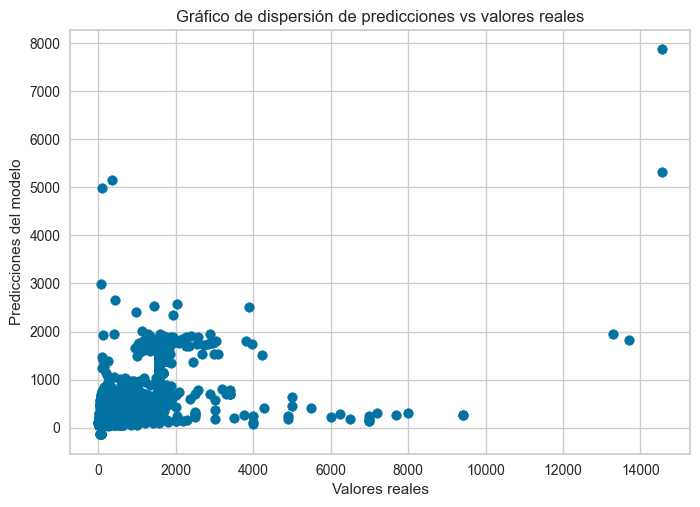

In [ ]:

# y_test son los valores reales y y_pred son las predicciones del modelo
plt.scatter(y_test, y_pred_hip)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones del modelo")
plt.title("Gráfico de dispersión de predicciones vs valores reales")
plt.show()


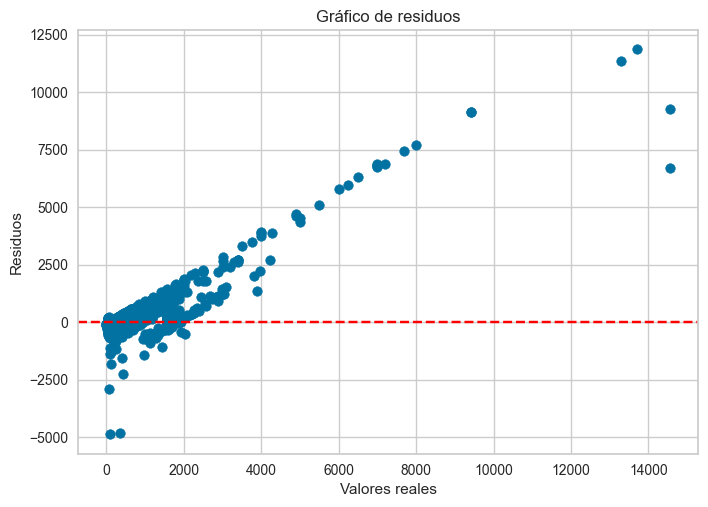

In [ ]:
residuals = y_test - y_pred_hip
plt.scatter(y_test, residuals)
plt.xlabel("Valores reales")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.axhline(y=0, color='red', linestyle='--')  # Línea en cero para referencia
plt.show()


Probar que recomendaciones de modelos nos da la libreria de automl pycaret

Partiendo el set original para modelamiento y pruebas para separar datos que el modelo no conoce y asi testear los resultados de las estimaciones.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (62416, 9)
Unseen Data For Predictions: (6935, 9)


In [ ]:
data.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Camden,51.53821,-0.14084,Private room,62,20,1,0,0
1,Camden,51.52444,-0.13861,Entire home/apt,220,3,1,0,0
2,Lambeth,51.43921,-0.11590,Private room,44,5,4,80,9
3,Lambeth,51.46970,-0.12757,Private room,92,1,1,260,39
4,Haringey,51.57908,-0.10294,Entire home/apt,80,4,1,0,0


In [ ]:
#s = setup(data = data, target = 'price', session_id=123,max_encoding_ohe=35,normalize = True,remove_multicollinearity = True, multicollinearity_threshold = 0.3,remove_outliers = True)

In [ ]:
#best = compare_models()

Entrenaremos un LightGBM con las variables seleccionadas anteriormente mediante el metodo selectKbest y  feature selection con ajuste de hiperparametros para ver como se comporta:

In [ ]:
# Crea el regresor LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

# Entrena el modelo en los datos de entrenamiento
lgb_model.fit(X_train_selected, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = lgb_model.predict(X_test_selected)



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 48545, number of used features: 15
[LightGBM] [Info] Start training from score 178.667999


In [ ]:
# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2} \nMean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}")

In [ ]:
# Define la grilla de hiperparámetros a explorar
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [20, 30, 40, 50, 60],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [100, 200, 300, 400]
}

# Crea un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    lgb_model, param_distributions=param_grid, n_iter=50, cv=3, scoring='neg_mean_squared_error', random_state=42
)

# Realiza la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train_selected, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Realiza predicciones en el conjunto de prueba con el mejor modelo encontrado
y_pred = random_search.best_estimator_.predict(X_test_selected)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 32363, number of used features: 15
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 178.421871
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


print(f"R-squared: {r2} \nMean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}")

R-squared: 0.3975743211717514 
Mean Squared Error: 83388.23336843809
Mean Absolute Error: 89.40634670028128
Root Mean Squared Error: 288.77020858883293


Observamos que en los modelos tenemos unas metricas de desempeño que se pueden mejorar bastante, intentaremos con la estrategia de crear 4 modelos diferentes. Uno para cada tipo distinto de propiedad.

Probemos a eliminar valores atipicos de las columnas numericas para ver como se comporta el modelo.

In [ ]:
data_encoded.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_Barking and Dagenham,neighbourhood_Barnet,neighbourhood_Bexley,...,neighbourhood_Southwark,neighbourhood_Sutton,neighbourhood_Tower Hamlets,neighbourhood_Waltham Forest,neighbourhood_Wandsworth,neighbourhood_Westminster,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,51.52874,-0.05396,55,3,1,74,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,51.56861,-0.11270,50,1,2,343,9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,51.52851,-0.07426,90,5,1,222,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,51.52478,-0.10484,180,4,5,236,20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,51.51464,-0.20004,297,14,1,180,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data_encoded[['price', 'latitude','longitude','minimum_nights','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000
mean,177.208822,51.509544,-0.128489,5.997505,11.987498,108.520266,4.734438
std,412.823024,0.049182,0.100957,25.709514,37.148839,132.821088,12.032502
min,0.000000,51.272480,-0.523600,1.000000,1.000000,0.000000,0.000000
25%,55.000000,51.483140,-0.189520,1.000000,1.000000,0.000000,0.000000
50%,100.000000,51.513600,-0.126200,2.000000,1.000000,32.000000,0.000000
75%,180.000000,51.539710,-0.068550,4.000000,4.000000,228.000000,5.000000
max,25000.000000,51.708930,0.305150,1125.000000,285.000000,365.000000,660.000000


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   latitude                              69351 non-null  float64
 1   longitude                             69351 non-null  float64
 2   price                                 69351 non-null  int64  
 3   minimum_nights                        69351 non-null  int64  
 4   calculated_host_listings_count        69351 non-null  int64  
 5   availability_365                      69351 non-null  int64  
 6   number_of_reviews_ltm                 69351 non-null  int64  
 7   neighbourhood_Barking and Dagenham    69351 non-null  float64
 8   neighbourhood_Barnet                  69351 non-null  float64
 9   neighbourhood_Bexley                  69351 non-null  float64
 10  neighbourhood_Brent                   69351 non-null  float64
 11  neighbourhood_B

Primero eliminamos los valores atipicos de la columna precio.


In [ ]:
Q1 = data_encoded['price'].quantile(0.25)
Q3 = data_encoded['price'].quantile(0.75)

IQR = Q3 - Q1


lower_limit= Q1 - 1.5 * IQR
upper_limit= Q3 + 1.5 * IQR

data_encoded= data_encoded[(data_encoded['price'] >= lower_limit) & (data_encoded['price'] <= upper_limit)]

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63910 entries, 0 to 69350
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   latitude                              63910 non-null  float64
 1   longitude                             63910 non-null  float64
 2   price                                 63910 non-null  int64  
 3   minimum_nights                        63910 non-null  int64  
 4   calculated_host_listings_count        63910 non-null  int64  
 5   availability_365                      63910 non-null  int64  
 6   number_of_reviews_ltm                 63910 non-null  int64  
 7   neighbourhood_Barking and Dagenham    63910 non-null  float64
 8   neighbourhood_Barnet                  63910 non-null  float64
 9   neighbourhood_Bexley                  63910 non-null  float64
 10  neighbourhood_Brent                   63910 non-null  float64
 11  neighbourhood_B

In [ ]:
data_encoded[['price', 'latitude','longitude','minimum_nights','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,63910.000000,63910.000000,63910.000000,63910.000000,63910.000000,63910.000000,63910.000000
mean,113.273103,51.509603,-0.126654,5.925677,8.574746,103.334439,4.836098
std,77.934140,0.050260,0.102824,25.353017,28.217014,131.102523,12.008161
min,0.000000,51.272480,-0.523600,1.000000,1.000000,0.000000,0.000000
25%,51.000000,51.481280,-0.189858,1.000000,1.000000,0.000000,0.000000
50%,90.000000,51.514110,-0.122685,2.000000,1.000000,19.000000,0.000000
75%,150.000000,51.540973,-0.065462,4.000000,3.000000,216.000000,5.000000
max,367.000000,51.708930,0.305150,1125.000000,285.000000,365.000000,660.000000


In [ ]:
Q1 = data_encoded['minimum_nights'].quantile(0.25)
Q3 = data_encoded['minimum_nights'].quantile(0.75)

IQR = Q3 - Q1


lower_limit= Q1 - 1.5 * IQR
upper_limit= Q3 + 1.5 * IQR

data_encoded= data_encoded[(data_encoded['minimum_nights'] >= lower_limit) & (data_encoded['minimum_nights'] <= upper_limit)]

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58419 entries, 0 to 69350
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   latitude                              58419 non-null  float64
 1   longitude                             58419 non-null  float64
 2   price                                 58419 non-null  int64  
 3   minimum_nights                        58419 non-null  int64  
 4   calculated_host_listings_count        58419 non-null  int64  
 5   availability_365                      58419 non-null  int64  
 6   number_of_reviews_ltm                 58419 non-null  int64  
 7   neighbourhood_Barking and Dagenham    58419 non-null  float64
 8   neighbourhood_Barnet                  58419 non-null  float64
 9   neighbourhood_Bexley                  58419 non-null  float64
 10  neighbourhood_Brent                   58419 non-null  float64
 11  neighbourhood_B

In [ ]:
data_encoded[['price', 'latitude','longitude','minimum_nights','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,58419.000000,58419.000000,58419.000000,58419.000000,58419.000000,58419.000000,58419.000000
mean,112.652647,51.509161,-0.127065,2.639518,8.094456,100.470977,5.154402
std,77.534779,0.050612,0.103436,1.735505,27.115748,130.408710,12.472554
min,0.000000,51.272480,-0.523600,1.000000,1.000000,0.000000,0.000000
25%,51.000000,51.480470,-0.190393,1.000000,1.000000,0.000000,0.000000
50%,90.000000,51.513941,-0.122850,2.000000,1.000000,13.000000,0.000000
75%,150.000000,51.540800,-0.065760,3.000000,3.000000,201.000000,5.000000
max,367.000000,51.708930,0.305150,8.000000,285.000000,365.000000,660.000000


In [ ]:
data_encoded.to_csv("../preprocesados/data_encoded_no_outliers.csv")

In [ ]:
df=data_encoded

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_Barking and Dagenham,neighbourhood_Barnet,neighbourhood_Bexley,...,neighbourhood_Southwark,neighbourhood_Sutton,neighbourhood_Tower Hamlets,neighbourhood_Waltham Forest,neighbourhood_Wandsworth,neighbourhood_Westminster,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,51.52874,-0.05396,55,3,1,74,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,51.56861,-0.11270,50,1,2,343,9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,51.52851,-0.07426,90,5,1,222,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,51.52478,-0.10484,180,4,5,236,20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,51.48780,-0.16813,75,3,1,70,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,51.48300,-0.01346,55,5,3,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
69347,51.50914,-0.10192,201,3,1,0,12,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69348,51.40571,-0.35325,246,3,1,4,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69349,51.41029,-0.35975,250,3,1,2,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_apto_casas_encoded_no_out=df[df['room_type']=='Entire home/apt']
df_hotel_rooms_encoded_no_out=df[df['room_type']=='Hotel room']
df_private_rooms_encoded_no_out=df[df['room_type']=='Private room']
df_shared_rooms_encoded_no_out=df[df['room_type']=='Shared room']

df_apto_casas_encoded_no_out.to_csv('../datos_separados/datos_apto_casas_encoded_no_out.csv', index=False)
df_hotel_rooms_encoded_no_out.to_csv('../datos_separados/datos_hotel_room_encoded_no_out.csv', index=False)
df_private_rooms_encoded_no_out.to_csv('../datos_separados/datos_private_room_encoded_no_out.csv', index=False)
df_shared_rooms_encoded_no_out.to_csv('../datos_separados/datos_shared_rooms_encoded_no_out.csv', index=False)
